In [ ]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# !pip install nlpaug

In [3]:
import torch
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import nlpaug.augmenter.word as naw
import math

c:\Users\saraujo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "local"

In [4]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(path_dataset + '/projects.csv')

In [6]:
df.shape

(19422, 6)

In [7]:
df.head()

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL
0,preparación de nano celulosa y su utilización ...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,Preparación de nano celulosa y su utilización ...,72.0,0
1,monitoreo no intrusivo de cargas eléctricas en...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,71.0,0
2,difusión del uso de herramientas tecnológicas ...,"Facultad de Arte, Diseño y Comunicación Audiov...",Diseño Gráfico,Difusión del uso de herramientas tecnológicas ...,62.0,0
3,plan de negocios para la venta de snacks salud...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,56.0,0
4,variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,Variacion del tiempo de fraguado debido a mixt...,56.0,0


In [8]:
df["titulo"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(18277, 18672, 10, 78)

In [9]:
df_titulo_count_all = df["titulo"].value_counts()
df_titulo_count = df_titulo_count_all[df_titulo_count_all > 1]
df_titulo_count

titulo
diseño de un equipo para la medición de la biodegradabilidad en películas polimérica y no poliméricas                                                                                                                       6
diseño estudio caracterización y evaluación de la factibilidad de uso de un envase innovador para la industria alimentaria en el mercado ecuatoriano                                                                        6
diseño de un sistema de riego automatizado mediante el suministro de energías no convencionales para la producción de cabras                                                                                                5
determinación de características de las playas de valdivia playa rosada y san pedro para apoyar el manejo de la anidación de tortugas en el país mediante acitividades de turismo responsable                               5
prototipo de control automático de calidad de comida usando imágenes hiperespectrales                    

In [10]:
df[df["titulo"] == df_titulo_count.keys()[0]]

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL
544,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Alimentos,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,24.0,0
574,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Mecánica,Diseño de un equipo para la medición de la bio...,24.0,0
2141,diseño de un equipo para la medición de la bio...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,16.0,0
2658,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Electricidad y Compu...,Electrónica y Automatización,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,15.0,0
4264,diseño de un equipo para la medición de la bio...,Facultad de Ciencias de la Vida,Biología,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,11.0,0
6248,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Ingeniería Mecánica,Diseño de un equipo para la medición de la bio...,2.0,0


In [11]:
df_carrera_count_all = df["CARRERA"].value_counts()
value_counts = 10
df_carrera_count = df_carrera_count_all[df_carrera_count_all >= value_counts]
df_carrera_count_less = df_carrera_count_all[df_carrera_count_all < value_counts]
df_carrera_count_all

CARRERA
Economía                                                             1523
Electricidad                                                         1371
Ingeniería Industrial                                                1018
Telecomunicaciones                                                    979
Ingeniería Comercial                                                  836
                                                                     ... 
Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos       5
Diplomado en Evaluación y Dirección de Proyectos de Inversión           5
Ciencias Biológicas                                                     3
Licenciatura en Sistema de Información (EDCOM)                          1
Programador de Sistemas                                                 1
Name: count, Length: 78, dtype: int64

In [12]:
df_carrera_count_all.shape, df_carrera_count.shape, df_carrera_count_less.shape

((78,), (71,), (7,))

In [13]:
df_carrera_count_less

CARRERA
Tecnología Superior en Logistica Portuaria                           9
Licenciatura en Sistema de Información                               5
Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos    5
Diplomado en Evaluación y Dirección de Proyectos de Inversión        5
Ciencias Biológicas                                                  3
Licenciatura en Sistema de Información (EDCOM)                       1
Programador de Sistemas                                              1
Name: count, dtype: int64

In [14]:
df_carrera_count

CARRERA
Economía                                                                               1523
Electricidad                                                                           1371
Ingeniería Industrial                                                                  1018
Telecomunicaciones                                                                      979
Ingeniería Comercial                                                                    836
                                                                                       ... 
Ingeniería en Alimentos                                                                  13
Diplomado Superior en Contaduría Pública y Finanzas con aplicación a la Informática      13
Ingeniería en Acuicultura                                                                12
Tecnología Superior en Mecatrónica                                                       11
Ingeniería Oceánica y Ciencias Ambientales                              

In [15]:
df_new = df[df["CARRERA"].isin(df_carrera_count.index)]
df_new.shape

(19393, 6)

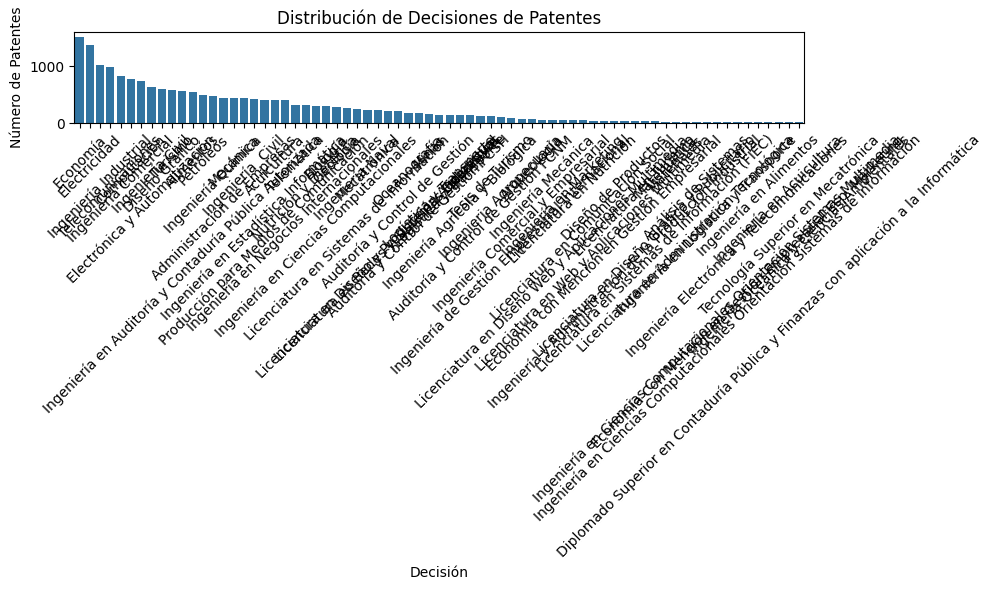

In [16]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='CARRERA', order=df_new['CARRERA'].value_counts().index)
plt.title('Distribución de Decisiones de Patentes')
plt.xlabel('Decisión')
plt.ylabel('Número de Patentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## DataAugmentation

In [ ]:
def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None):
    """Balancea dataset usando múltiples GPUs con paralelización intra-clase"""
    # Verificar GPUs disponibles
    available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
    print(f"GPUs disponibles: {available_gpus}")

    if available_gpus == 0:
        print("⚠️ No hay GPUs disponibles, usando CPU")
        gpu_ids = ['cpu']
    elif available_gpus < len(gpu_ids):
        print(f"⚠️ Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
        gpu_ids = gpu_ids[:available_gpus]

    # Crear augmenters para cada GPU
    augmenters = {}
    for gpu_id in gpu_ids:
        device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
        augmenters[gpu_id] = naw.ContextualWordEmbsAug(
            model_path='bert-base-multilingual-uncased',
            aug_p=0.1,
            device=device
        )
        print(f"✅ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

    # Análisis de clases
    class_counts = df[label_col].value_counts()
    # --------------------------------------------------
    if target_count is None:
        target_count = class_counts.max()
        print(f"🔍 No se especificó target_count, ahora se usarà el máximo de clases: {target_count:,}")
    # --------------------------------------------------


    print(f"\nDistribución actual:")
    for class_label, count in class_counts.items():
        print(f"  {class_label}: {count:,}")
    print(f"\nObjetivo: {target_count:,} muestras por clase")

    def process_batch_on_gpu(args):
        """Procesa un lote de una clase en una GPU específica"""
        class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

        augmenter = augmenters[gpu_id]
        augmented_data = []

        batch_end = min(batch_start + batch_size, total_needed)
        actual_batch_size = batch_end - batch_start
        print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

        print(f"🚀 {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
              f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")

            
        # Procesar en mini-batches
        mini_batch_size = 16
        for i in range(0, actual_batch_size, mini_batch_size):
            mini_end = min(i + mini_batch_size, actual_batch_size)
            print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
            mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
            print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

            try:
                augmented_batch = augmenter.augment(mini_texts, 
                                                    n=math.ceil((batch_end - i) / len(class_texts)),
                                                    num_thread=1 if gpu_id == 'cpu' else 4)

                for j, aug_text in enumerate(augmented_batch):
                    # Mantener las columnas originales del dataframe
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: aug_text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })

            except Exception as e:
                print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
                # Fallback
                for j, text in enumerate(mini_texts):
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })
            finally:
                print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

        print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
              f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
        return augmented_data

    # Preparar trabajos dividiendo cada clase entre GPUs
    all_jobs = []

    for class_label, current_count in class_counts.items():
        needed = target_count - current_count
        
        if needed <= 0:
            print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
            continue

        print("needed", needed, "needed menos", 5000, "target_count", target_count, "current_count", current_count)
        # needed = 5000
        
        class_texts = df[df[label_col] == class_label][text_col].tolist()
        class_texts.reverse()

        num_batches = 8  # O el número de hilos que quieras
        batch_size = math.ceil(needed / num_batches)
        for i in range(num_batches):
            batch_start = i * batch_size
            if batch_start >= needed:
                break
            this_batch_size = min(batch_size, needed - batch_start)
            print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
                  f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tamaño de class_texts los {label_col} = {len(class_texts)}")
            all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


    if not all_jobs:
        print("✅ El dataset ya está balanceado")
        return df

    print(f"\n🔥 Total de trabajos paralelos: {len(all_jobs)}")

    # Ejecutar todos los trabajos en paralelo
    all_augmented_data = []
    max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
    # max_workers = len(all_jobs)
    print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(process_batch_on_gpu, all_jobs)

        for result in results:
            all_augmented_data.extend(result)

    # Combinar resultados
    if all_augmented_data:
        augmented_df = pd.DataFrame(all_augmented_data)
        balanced_df = pd.concat([df, augmented_df], ignore_index=True)
    else:
        balanced_df = df.copy()

    print(f"\n🎉 Completado!")
    print(f"Total original: {len(df):,}")
    print(f"Total final: {len(balanced_df):,}")
    print(f"Muestras añadidas: {len(all_augmented_data):,}")

    # Mostrar distribución final
    final_counts = balanced_df[label_col].value_counts()
    print(f"\nDistribución final:")
    for class_label, count in final_counts.items():
        print(f"  {class_label}: {count:,}")

    # Mostrar uso detallado por GPU
    if len(all_augmented_data) > 0:
        augmented_df_temp = pd.DataFrame(all_augmented_data)

        print("\n📊 Uso detallado por GPU:")
        gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

        for gpu_id in gpu_ids:
            gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
            total_gpu = gpu_data['count'].sum()
            print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

            for _, row in gpu_data.iterrows():
                print(f"    - {row[label_col]}: {row['count']:,}")

    return balanced_df

In [ ]:
balanced_df = balance_with_multi_gpu_parallel(df, gpu_ids=[0], target_count=5000)

GPUs disponibles: 0
⚠️ No hay GPUs disponibles, usando CPU


The following layers were not sharded: cls.predictions.transform.LayerNorm.weight, bert.encoder.layer.*.attention.self.value.weight, cls.predictions.decoder.bias, bert.embeddings.LayerNorm.weight, bert.embeddings.position_embeddings.weight, bert.encoder.layer.*.output.LayerNorm.bias, bert.encoder.layer.*.output.dense.weight, bert.encoder.layer.*.attention.self.query.bias, bert.encoder.layer.*.attention.output.LayerNorm.bias, bert.encoder.layer.*.attention.output.dense.bias, cls.predictions.bias, cls.predictions.decoder.weight, bert.embeddings.LayerNorm.bias, bert.encoder.layer.*.intermediate.dense.weight, bert.encoder.layer.*.attention.self.query.weight, bert.encoder.layer.*.output.LayerNorm.weight, bert.encoder.layer.*.attention.output.LayerNorm.weight, bert.encoder.layer.*.attention.output.dense.weight, bert.encoder.layer.*.intermediate.dense.bias, bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.attention.self.key.bias, bert.encoder.layer.*.attention.self.value.bias, cls

✅ Augmenter creado en CPU cpu

Distribución actual:
  Economía: 1,523
  Electricidad: 1,371
  Ingeniería Industrial: 1,018
  Telecomunicaciones: 979
  Ingeniería Comercial: 836
  Computación: 772
  Electrónica y Automatización: 739
  Ingeniería Civil: 638
  Diseño Gráfico: 600
  Turismo: 577
  Ingeniería en Auditoría y Contaduría Pública Autorizada: 565
  Alimentos: 550
  Petróleos: 497
  Ingeniería Química: 468
  Administración de Empresas: 449
  Mecánica: 448
  Ingeniería  Civil: 435
  Ingeniería en Estadística Informática: 420
  Producción para Medios de Comunicación: 412
  Acuicultura: 410
  Ingeniería en Negocios Internacionales: 407
  Telemática: 316
  Nutrición y Dietética: 310
  Ingeniería en Ciencias Computacionales: 298
  Biología: 294
  Geología: 279
  Licenciatura en Sistemas de Información: 272
  Ingeniería Naval: 255
  Mecatrónica: 233
  Licenciatura en Diseño y Producción Audiovisual: 229
  Licenciatura en Redes y Sistemas Operativos: 212
  Auditoría y Control de Gestión

In [ ]:
balanced_df.to_csv(path_dataset + "/projects_augmented_" + sufix + ".csv", index=False)